# Análise Marketplace

Esse problema de marketplace foi me passado por um amigo, não tenho certeza da origem, provavelmente recebeu em um processo seletivo. Imagino que esse problema não seja mais usado para esse fim, então eu vou divulgá-lo com a minha análise como portifólio.

-----

# **Descrição do problema**


Dentro da empresa existe uma equipe que é responsável por definir as características de produtos
que vão ser construídos. Para uma categoria de liquidificadores, por exemplo, essa equipe fica
responsável por definir a cor, volume do copo, material do copo ou mesmo se vai ter um filtro para
suco de frutas.


Para definir as características das diferentes categorias de produtos, a equipe procura entender
quando o cliente se interessa por um produto. É nesse ponto que o time do Labs é chamado. O seu
objetivo principal é desenvolver um modelo que consiga classificar o produto entre "interessante" e
"não interessante" dados os atributos do mesmo. Além disso, é desejável que você também consiga
indicar quais são os atributos e respectivos valores que mais impulsionam o interesse do cliente.
Mais importante que o resultado final é a sua estratégia de solução. Deixe claro cada passo da sua
solução e explique as decisões tomadas durante o processo. Também é importante que você nos
mande o seu código desenvolvido (Python ou Scala). Uma sugestão é usar Jupyter Notebook.
Assim, você consegue explicar cada ponto da sua estratégia de forma mais explícita.
Esperamos receber de você um documento com a explicação do trabalho desenvolvido.


 **Bom trabalho!**


Conjunto de dados


O conjunto de dados possui os atributos de cada produto de uma categoria de panelas e se houve ou
não interesse do cliente ao visualizar o produto no site. Cada linha é o registro da visualização de
um cliente em determinado momento.

-----

Importando as bibliotecas e o dataframe

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('problem1_dataset.csv')

**Análise exploratória dos dados**

In [3]:
df.sample(10)

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,...,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED
109249,227368822,42.70,4.5,ALUMINIO,CEREJA,REDONDO,32.70,TRAMONTINA,Yes,no,...,18.10,12.0,NAO,NAO,0.0,PANELA,SIM,985.378237,92.558065,0.0
35166,241440074,62.00,NaN,INOX,INOX,NaN,19.00,EURO HOME,Yes,no,...,41.00,6.0,NAO,NAO,0.0,CUSCUZEIRA,NAO,699.688198,60.900000,0.0
58111,256719146,23.00,NaN,INOX,PRETO,NaN,20.00,VEC,NaN,NaN,...,21.00,6.0,NAO,NAO,1.0,CHALEIRA,NAO,671.342296,34.990000,1.0
83734,14581492,32.00,4.5,ALUMINIO,PRETO,NaN,32.00,TRAMONTINA,Yes,no,...,15.00,12.0,NAO,NAO,1.0,PANELA,SIM,707.197980,97.323333,0.0
154072,248655628,39.00,10.0,INOX,INOX,REDONDO,17.70,HERCULES,Yes,no,...,39.00,3.0,NAO,NAO,0.0,ESPAGUETEIRA,NAO,146.320951,363.370000,0.0
176447,227368822,42.70,4.5,ALUMINIO,CEREJA,REDONDO,32.70,TRAMONTINA,Yes,no,...,18.10,12.0,NAO,NAO,0.0,PANELA,SIM,689.606588,95.000000,0.0
58102,253661478,49.50,6.0,ALUMINIO,GRAFITE,REDONDO,41.50,TRAMONTINA,Yes,NaN,...,47.00,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,797.528622,119.990000,0.0
102938,238630912,22.00,NaN,ALUMINIO,COLORIDO,NaN,24.00,TRAMONTINA,No,no,...,40.00,12.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,838.696360,103.490000,0.0
65300,253715602,78.25,5.3,INOX,INOX,REDONDO,52.75,LA CUISINE,NaN,NaN,...,28.75,3.0,NAO,NAO,1.0,ESPAGUETEIRA,NAO,997.834164,154.990000,0.0
69725,254633548,30.50,NaN,ALUMINIO,AMARELO,REDONDO,14.00,LA CUISINE,NaN,NaN,...,50.00,3.0,NAO,SIM,1.0,PANELA,NAO,662.738073,199.990000,1.0


Reutilização de uma função útil obtina no kaggle

In [4]:
def resume(df):
    """
    Objective: For a given dataframe this function provides information
    regarding Missing and Unique values per column.

    Input: param df: Dataframe to check the information.

    Output: return summary: a dataframe with columns providing summary per column of the input dataframe.
    
    """
    df = df.copy()
    #print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing Percentage'] = df.isnull().sum().values/len(df)
    summary['Uniques'] = df.nunique().values
    return summary

In [5]:
resume(df)

,Name,dtypes,Missing,Missing Percentage,Uniques
0,ITEM_ID,int64,0,0.000000,787
1,ALTURA,float64,9268,0.051410,125
2,CAPACIDADE_(L),float64,103604,0.574700,58
3,COMPOSICAO,object,23297,0.129230,5
4,COR,object,10024,0.055604,24
5,FORMATO,object,90264,0.500702,5
6,LARGURA,float64,9268,0.051410,118
7,MARCA,object,274,0.001520,35
8,PARA_LAVA_LOUCAS,object,76189,0.422627,3
9,PARA_MICRO_ONDAS,object,93873,0.520721,2


In [6]:
df.describe()

,ITEM_ID,ALTURA,CAPACIDADE_(L),LARGURA,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_TAMPA,SESSION_ID,ITEM_PRICE,INTERESTED
count,1.802750e+05,171007.000000,76671.000000,171007.000000,98524.000000,171007.000000,122770.000000,180275.000000,178273.000000,167178.000000,180275.000000
mean,2.156229e+08,30.575636,4.234668,27.882157,311.259118,34.797386,13.870742,0.440704,499.757195,127.831019,0.086130
std,1.030257e+08,14.856403,1.699274,10.494943,1727.585999,15.179911,43.641581,0.496473,288.841689,137.298241,0.280556
min,2.939160e+05,2.000000,0.045000,4.500000,0.619000,2.500000,1.000000,0.000000,1.011194,0.550000,0.000000
25%,2.273688e+08,19.000000,3.100000,20.000000,120.000000,19.800000,3.000000,0.000000,249.343773,74.990000,0.000000
50%,2.485863e+08,30.500000,4.500000,27.800000,160.000000,38.500000,6.000000,0.000000,500.759182,104.482418,0.000000
75%,2.567376e+08,42.700000,6.000000,35.000000,190.000000,47.000000,12.000000,1.000000,749.204738,146.327727,0.000000
max,2.711264e+10,84.000000,11.000000,91.000000,44400.000000,148.000000,300.000000,1.000000,1000.984988,2274.990000,1.000000


Importando bibliotecas de visualização de dados

In [7]:
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

<AxesSubplot:xlabel='INTERESTED', ylabel='Count'>

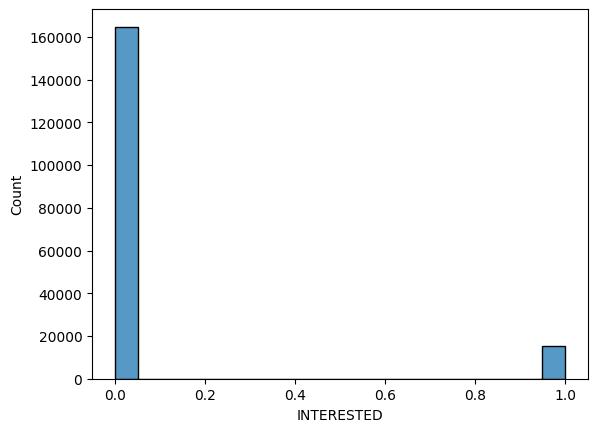

In [8]:
sns.histplot(df['INTERESTED'])

Os dados retulados estão um pouco desbalanceados

<AxesSubplot:xlabel='ITEM_ID', ylabel='INTERESTED'>

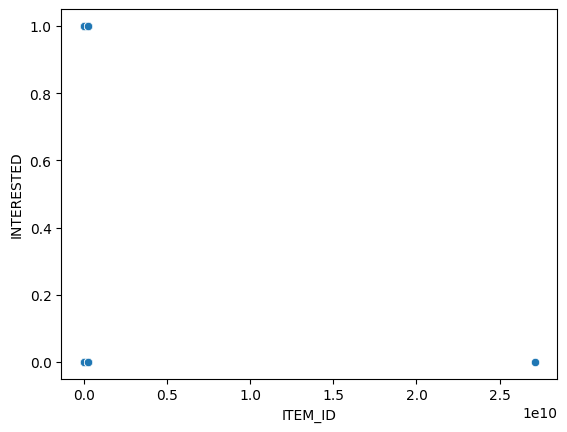

In [9]:
sns.scatterplot(x=df['ITEM_ID'],y=df['INTERESTED'])

/home/djego/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ITEM_ID'>

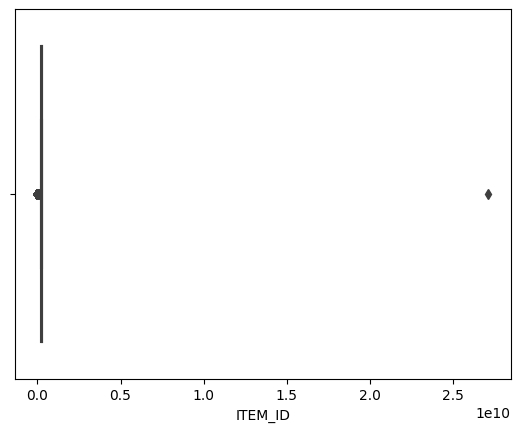

In [10]:
sns.boxplot(df['ITEM_ID'])

In [11]:
df['SESSION_ID'].max()

1000.98498803

In [12]:
df1 = df[df['SESSION_ID']>1000]
df2 = df[df['SESSION_ID']>1000]

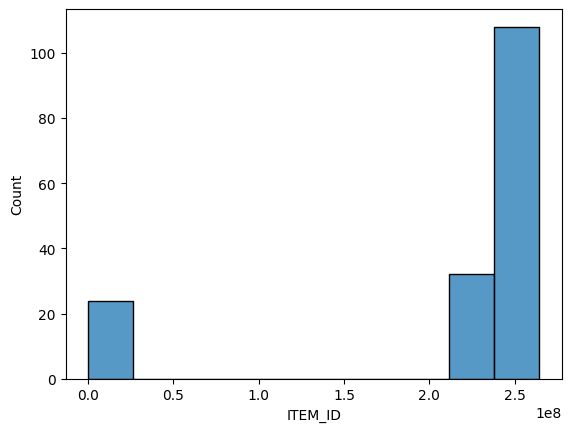

In [13]:
plot = sns.histplot(df1['ITEM_ID'],bins=10)

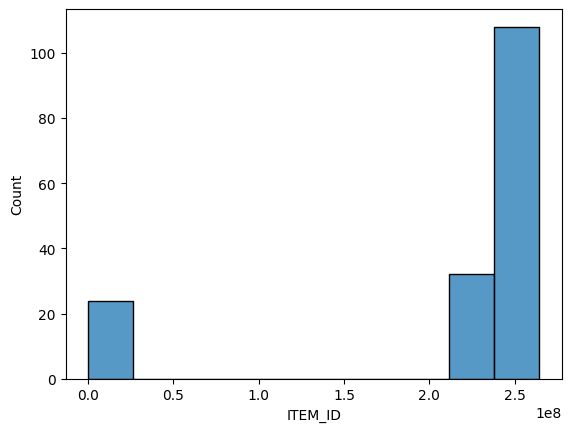

In [14]:
plot2 = sns.histplot(df2['ITEM_ID'],bins=10)

O atributo SESSION_ID está relacionado com o comportamento de cada usuário no sistema, para esse problema, não estamos interessados em classificar usuários, e esse atributo deve ser removido para evitar vazamento de informação.

**Ação 1- Remover coluna SESSION_ID**

/home/djego/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ITEM_ID'>

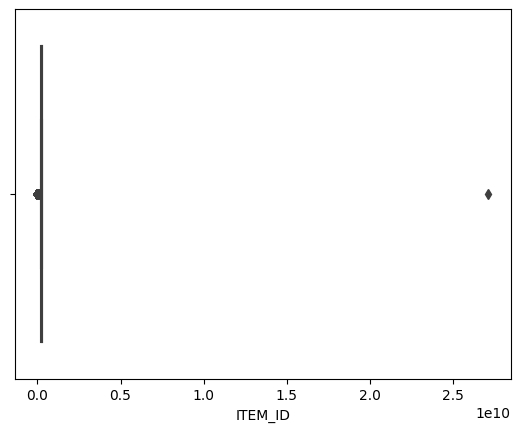

In [15]:
sns.boxplot(df['ITEM_ID'])

O mesmo efeito acontece com o atributo ITEM_ID, estamos focados nas características de um produto que são interessantes e não nos produtos que possuem essas características.

**Ação 2- Remover coluna ITEM_ID**

<AxesSubplot:xlabel='ALTURA', ylabel='Count'>

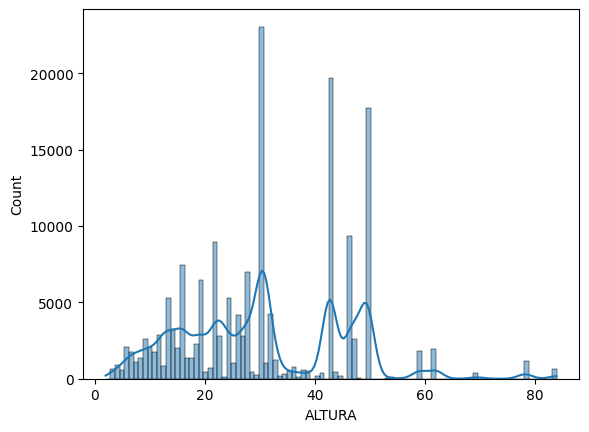

In [16]:
sns.histplot(df['ALTURA'],kde=True)

<AxesSubplot:xlabel='CAPACIDADE_(L)', ylabel='Count'>

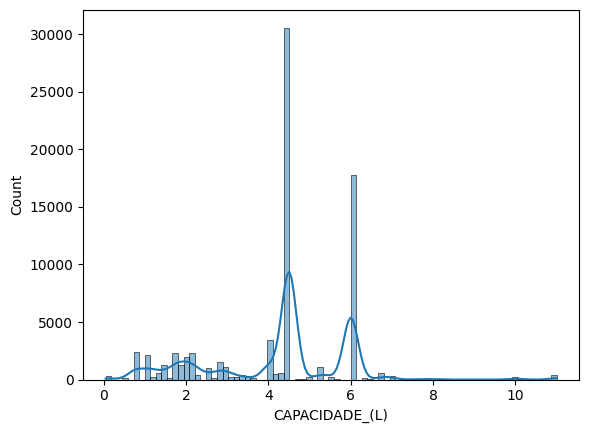

In [17]:
sns.histplot(df['CAPACIDADE_(L)'],kde=True)

<AxesSubplot:xlabel='LARGURA', ylabel='Count'>

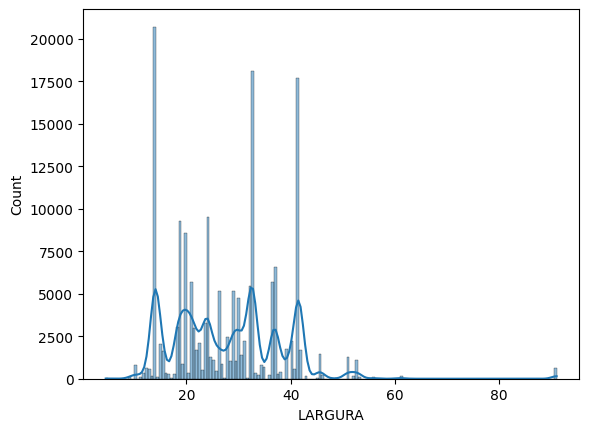

In [18]:
sns.histplot(df['LARGURA'],kde=True)

[(1000.0, 19759.95)]

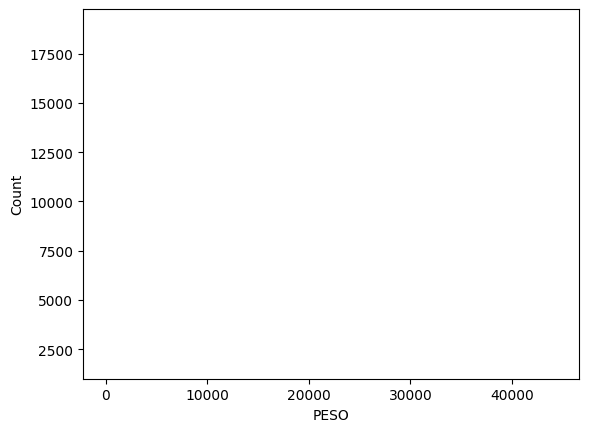

In [19]:
grafico = sns.histplot(data=df, x='PESO', kde=True)
grafico.set(ylim=1000)

<AxesSubplot:xlabel='PROFUNDIDADE', ylabel='Count'>

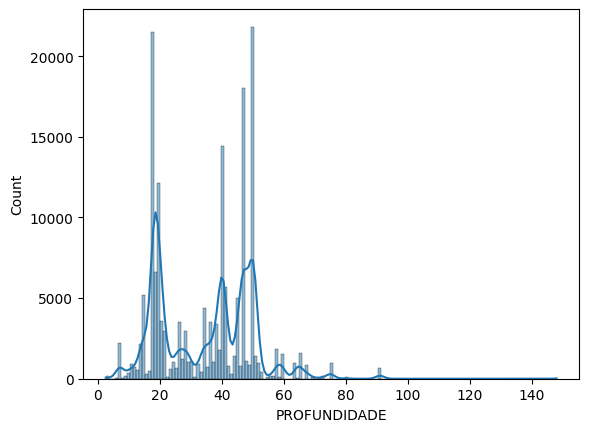

In [20]:
sns.histplot(df['PROFUNDIDADE'], kde=True)

<AxesSubplot:xlabel='TEMPO_GARANTIA', ylabel='Count'>

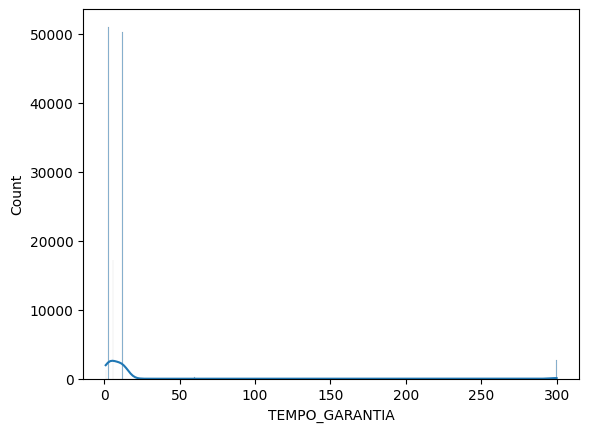

In [21]:
sns.histplot(df['TEMPO_GARANTIA'], kde=True)

In [22]:
df['TEMPO_GARANTIA'].unique()

array([  3.,  12.,  nan,   6., 300.,   1.,  60.])

Os valores de TEMPO_GARANTIA está com unidades misturadas, meses e dias

**Ação 3 - converter valores de TEMPO_GARANTIA para meses**

In [23]:
df['COR'].unique()

array(['VINHO', 'COLORIDO', 'INOX', 'VERMELHO', 'AMARELO', 'LARANJA',
       'CEREJA', 'PRETO', 'GRAFITE', nan, 'ROXO', 'TURQUESA', 'PRATA',
       'GOIABA', 'BERINGELA', 'AZUL', 'MARROM', 'VERDE', 'COBRE',
       'CHOCOLATE', 'FENDI', 'BRANCO', 'ROSA', 'ACACIA', 'CINZA'],
      dtype=object)

In [24]:
df['FORMATO'].unique()

array([nan, 'REDONDO', 'FRIGIDEIRA', 'OVAL', 'QUADRADO', 'RETANGULAR'],
      dtype=object)

In [25]:
df['COMPOSICAO'].unique()

array(['ALUMINIO', 'INOX', nan, 'CERAMICA', 'PORCELANA', 'ACO ESMALTADO'],
      dtype=object)

In [26]:
df['MARCA'].unique()

array(['LA CUISINE', 'TRAMONTINA', 'EURO', 'PANELA MINEIRA', 'FUMIL',
       'CERAFLAME', 'EURO HOME', 'VEC', 'BRINOX', 'ALUMINIO FORTALEZA',
       'MTA', 'HAPPYCALL', 'HERCULES', 'SUN GUIDER', 'ROCHEDO',
       'ELECTROLUX', 'PANELUX', 'DONA CHEFA', 'ALUMINIO RAMOS',
       'TRAMONTINA DESIGN COLLECTION', 'MIMO STYLE', 'PRAVA', nan,
       'AT.HOME', 'JOMAFE', 'OXFORD COOKWARE', 'PRAVAS', 'FORMA',
       'BIALETTI', 'BR HOME', 'ZANELLA', 'CLASSIC HOME', 'DYNASTY',
       'MERIDIONAL', 'CONSUL', 'HELIOS'], dtype=object)

In [27]:
df['TIPO_PRODUTO'].unique()

array(['PANELA', 'PIPOQUEIRA', 'ESPAGUETEIRA', 'CREMEIRA', 'WOK',
       'CACAROLA', 'CUSCUZEIRA', 'CHAPA', 'CHALEIRA', 'FRIGIDEIRA',
       'FERVEDOR', 'SANDUICHEIRA', 'FONDUE', 'MINI-CACAROLA',
       'OMELETEIRA', 'PAELLERA', 'BIFETEIRA', 'CALDEIRAO', 'CUMBUCA',
       'PANQUEQUEIRA', 'FRITADEIRA', 'FOGAREIRO', 'FORMA', 'LEITEIRA',
       'GRILL', 'BULE', 'COZI-VAPORE', 'ASSADEIRA', 'TAMPA', 'COZI-PASTA',
       'PRENSADOR', 'CUSCUZEIRO', 'FORNO', 'PAPEIRO', 'BISTEQUEIRA',
       'CANECO', 'VAPORELLA', 'CANECA/FERVEDOR'], dtype=object)

In [28]:
df[df['TIPO_PRODUTO']=='WOK'].TIPO_WOK.value_counts()

SIM    4829
Name: TIPO_WOK, dtype: int64

In [29]:
df[df['TIPO_PRODUTO']!='WOK'].TIPO_WOK.value_counts()

NAO    144820
SIM     30626
Name: TIPO_WOK, dtype: int64

A panela do tipo wok é uma panela com o fundo redondo como a da imagem abaixo.

![Alt text](wok.jpeg)

A informação contida no atributo TIPO_PRODUTO quando possue o valor WOK está todo contido no outro atributo TIPO_WOK. Sendo assim o valor WOK pode ser modificado para o valor neutro COMUM 

**Ação 4 - Substituir valor WOK em TIPO_PRODUTO por valor COMUM**

In [30]:
df[df['TIPO_PRODUTO']=='TAMPA'].TEM_TAMPA.value_counts()

1.0    185
Name: TEM_TAMPA, dtype: int64

In [31]:
df[df['TIPO_PRODUTO']!='TAMPA'].TEM_TAMPA.value_counts()

0.0    100827
1.0     79263
Name: TEM_TAMPA, dtype: int64

A informação contida no atributo TIPO_PRODUTO quando possue o valor TAMPA está todo contido no outro atributo TEM_TAMPA. Sendo assim o valor TAMPA pode ser modificado para o valor neutro COMUM 

**Ação 5 - Substituir valor TAMPA em TIPO_PRODUTO por valor COMUM**

In [32]:
df[df['TIPO_PRODUTO']!='COZI-PASTA'].MARCA.value_counts()

TRAMONTINA                      72904
LA CUISINE                      32241
PANELA MINEIRA                  13028
BRINOX                           8145
VEC                              7728
EURO HOME                        6801
FUMIL                            5836
HERCULES                         5654
EURO                             4450
HAPPYCALL                        4313
ALUMINIO FORTALEZA               2322
PANELUX                          2272
SUN GUIDER                       1970
MTA                              1927
CERAFLAME                        1679
ROCHEDO                          1645
DONA CHEFA                       1357
JOMAFE                           1241
AT.HOME                          1170
ELECTROLUX                        917
ALUMINIO RAMOS                    797
MIMO STYLE                        283
OXFORD COOKWARE                   253
FORMA                             155
TRAMONTINA DESIGN COLLECTION      149
PRAVA                             139
PRAVAS      

In [33]:
df[df['TIPO_PRODUTO']!='ESPAGUETEIRA'].MARCA.value_counts()

TRAMONTINA                      72675
LA CUISINE                      26014
PANELA MINEIRA                  13028
BRINOX                           7862
VEC                              7728
EURO HOME                        6801
FUMIL                            5836
HERCULES                         5417
EURO                             4450
HAPPYCALL                        4313
ALUMINIO FORTALEZA               2322
SUN GUIDER                       1969
MTA                              1927
CERAFLAME                        1679
ROCHEDO                          1645
PANELUX                          1526
DONA CHEFA                       1357
JOMAFE                           1241
AT.HOME                          1170
ELECTROLUX                        917
ALUMINIO RAMOS                    797
MIMO STYLE                        283
OXFORD COOKWARE                   253
TRAMONTINA DESIGN COLLECTION      149
PRAVA                             139
PRAVAS                            130
CONSUL      

Uma panela TIPO_PRODUTO que é ESPAGUETEIRA provavelvente é uma panela que tem ou um escorredor de espague interno (tipo 1) ou uma tampa com um escorredor (tipo 2) como nas figuras abaixo.

![Alt text](espagueteira_1.webp)  ![Alt text](espagueteira_2.webp)

Já o tipo COZI-PASTA é o mesmo que uma espagueteira tipo 1.

Existe uma sobreposição de informação devido a uma ação de marketing. Talvez o impacto dessa ação possa ser medida pelo modelo.

**Tratamento de dados faltantes**

In [34]:
resumo = resume(df)

In [35]:
resumo =resumo[resumo['Missing Percentage']!=0]
resumo =resumo[resumo['Missing Percentage']<0.1]
resumo = resumo.drop(18,axis=0)#Atributo já tratado
resumo

,Name,dtypes,Missing,Missing Percentage,Uniques
1,ALTURA,float64,9268,0.051410,125
4,COR,object,10024,0.055604,24
6,LARGURA,float64,9268,0.051410,118
7,MARCA,object,274,0.001520,35
11,PROFUNDIDADE,float64,9268,0.051410,152
19,ITEM_PRICE,float64,13097,0.072650,3891


**AÇÃO 6 - As linhas serão removidas para os atributos que têm menos de 10% dos dados faltantes**

Para os atributos categóricos 

**AÇÃO 7 - COMPOSIÇÃO, FORMATO e TIPO_PRODUTO**  possuem **dados faltantes** e **serão substituidos por**


**sem_composição, sem_formato e sem_tipo** respectivamente.

In [36]:
resumo2 = resume(df)
resumo2 = resumo2[resumo2['dtypes']== 'float64']
resumo2 = resumo2[resumo2['Missing Percentage']!= 0]
resumo2 = resumo2.drop([1,6,11,19,18],axis=0)#Dados faltantes já tratados
resumo2

,Name,dtypes,Missing,Missing Percentage,Uniques
2,CAPACIDADE_(L),float64,103604,0.574700,58
10,PESO,float64,81751,0.453479,100
12,TEMPO_GARANTIA,float64,57505,0.318985,6


**Ação 8 - Os valores faltantes nas variáveis numéricas CAPACIDADE_(L), PESO e TEMPO_GARANTIA terão os dados faltantes subtituidos por 0**



In [37]:
resumo3 = resume(df)
resumo3 = resumo3[resumo3['Uniques']<=3]
resumo3

,Name,dtypes,Missing,Missing Percentage,Uniques
8,PARA_LAVA_LOUCAS,object,76189,0.422627,3
9,PARA_MICRO_ONDAS,object,93873,0.520721,2
13,TEM_FERRO_FUNDIDO,object,0,0.000000,2
14,TEM_GRELHA,object,0,0.000000,2
15,TEM_TAMPA,float64,0,0.000000,2
17,TIPO_WOK,object,0,0.000000,2
20,INTERESTED,float64,0,0.000000,2


Já que a porcentagem de dados faltantes é baixa e não afetaria a quantidade significativa de informação é possível removẽ-las.

**Ação 9 - Para os atributos categóricos binários remover as linhas dos dados faltantes**

In [38]:
def feat_eng(dataframe):
    df=dataframe.copy()

    df.drop('SESSION_ID',axis=1,inplace=True)#Ação 1

    df.drop('ITEM_ID',axis=1,inplace=True)#Ação 2

    df['TEMPO_GARANTIA'].replace(1.0,12.0,inplace=True)#Ação 3
    df['TEMPO_GARANTIA'].replace(300,10.0,inplace=True)
    df['TEMPO_GARANTIA'].replace(60,3.0,inplace=True)

    df['TIPO_PRODUTO'].replace('WOK','COMUM',inplace=True)#Ação 4

    df['TIPO_PRODUTO'].replace('TAMPA','COMUM',inplace=True)#Ação 5

    #df.dropna(subset=['ALTURA','COR','LARGURA','MARCA','PROFUNDIDADE','ITEM_PRICE'],axis=0,inplace=True)#Ação 6
    #a procentagem somada das colunas removidas chegava a 40% retirando informações importantes de outroa atributos
    df['ALTURA'].fillna(0.0,inplace=True)
    df['COR'].fillna('Sem_cor',inplace=True)
    df['LARGURA'].fillna(0.0,inplace=True)
    df['MARCA'].fillna('sem_marca',inplace=True)
    df['PROFUNDIDADE'].fillna(0.0,inplace=True)
    df['ITEM_PRICE'].fillna(0.0,inplace=True)
    
    
    df['COMPOSICAO'].fillna('sem_composição',inplace=True)#Ação 7
    df['FORMATO'].fillna('sem_formato',inplace=True)
    df['TIPO_PRODUTO'].fillna('sem_tipo',inplace=True)

    df['CAPACIDADE_(L)'].fillna(0,inplace=True)#Ação 8
    df['PESO'].fillna(0,inplace=True)
    df['TEMPO_GARANTIA'].fillna(0,inplace=True)

    #df.dropna(subset=['PARA_LAVA_LOUCAS','PARA_MICRO_ONDAS'],axis=0, inplace=True)#Ação 9
    df['PARA_LAVA_LOUCAS'].fillna(0.0,inplace=True)
    df['PARA_MICRO_ONDAS'].fillna(0.0,inplace=True)

    return df

    
    

In [39]:
def num_encode(dataf):
    binary_feat = ['TEM_FERRO_FUNDIDO','TEM_GRELHA','TIPO_WOK','PARA_LAVA_LOUCAS','PARA_MICRO_ONDAS']
    #replecement = [['NAO',0.0],['No',0.0],['no',0.0],['SIM',1.0],['Yes',1.0],['yes',1.0]]
    for binary in binary_feat:
        dataf[binary].replace('NAO',0.0,inplace=True)
        dataf[binary].replace('No',0.0,inplace=True)
        dataf[binary].replace('no',0.0,inplace=True)
        dataf[binary].replace('SIM',1.0,inplace=True)
        dataf[binary].replace('Yes',1.0,inplace=True)
        dataf[binary].replace('yes',1.0,inplace=True)
    
    return dataf


In [40]:
df

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,...,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED
0,264220456,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,...,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,86.709770,199.990000,0.0
1,238630912,22.0,NaN,ALUMINIO,COLORIDO,NaN,24.0,TRAMONTINA,No,no,...,40.0,12.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,73.156401,105.112581,0.0
2,218228122,24.0,NaN,INOX,INOX,NaN,20.0,LA CUISINE,Yes,no,...,20.0,3.0,NAO,NAO,1.0,ESPAGUETEIRA,NAO,952.331024,139.990000,0.0
3,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,...,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,637.759106,103.293333,1.0
4,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,...,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,478.531428,103.330242,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180270,264220456,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,...,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,771.270313,199.990000,1.0
180271,257484236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NAO,NAO,0.0,ESPAGUETEIRA,NAO,193.156933,NaN,0.0
180272,256719114,16.0,NaN,INOX,INOX,NaN,18.5,VEC,NaN,NaN,...,18.5,6.0,NAO,NAO,0.0,CHALEIRA,NAO,436.363021,35.052381,0.0
180273,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,...,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,125.988425,105.116593,0.0


In [41]:
data = feat_eng(df)
data

,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,ITEM_PRICE,INTERESTED
0,30.5,0.0,ALUMINIO,VINHO,sem_formato,14.0,LA CUISINE,0.0,0.0,0.0,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,199.990000,0.0
1,22.0,0.0,ALUMINIO,COLORIDO,sem_formato,24.0,TRAMONTINA,No,no,150.0,40.0,12.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,105.112581,0.0
2,24.0,0.0,INOX,INOX,sem_formato,20.0,LA CUISINE,Yes,no,190.0,20.0,3.0,NAO,NAO,1.0,ESPAGUETEIRA,NAO,139.990000,0.0
3,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,0.0,120.0,47.0,0.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,103.293333,1.0
4,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,0.0,120.0,47.0,0.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,103.330242,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180270,30.5,0.0,ALUMINIO,VINHO,sem_formato,14.0,LA CUISINE,0.0,0.0,0.0,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,199.990000,1.0
180271,0.0,0.0,sem_composição,Sem_cor,sem_formato,0.0,sem_marca,0.0,0.0,0.0,0.0,0.0,NAO,NAO,0.0,ESPAGUETEIRA,NAO,0.000000,0.0
180272,16.0,0.0,INOX,INOX,sem_formato,18.5,VEC,0.0,0.0,0.0,18.5,6.0,NAO,NAO,0.0,CHALEIRA,NAO,35.052381,0.0
180273,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,0.0,120.0,47.0,0.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,105.116593,0.0


In [42]:
data = num_encode(data)
data

,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,ITEM_PRICE,INTERESTED
0,30.5,0.0,ALUMINIO,VINHO,sem_formato,14.0,LA CUISINE,0.0,0.0,0.0,50.0,3.0,0.0,1.0,1.0,PANELA,0.0,199.990000,0.0
1,22.0,0.0,ALUMINIO,COLORIDO,sem_formato,24.0,TRAMONTINA,0.0,0.0,150.0,40.0,12.0,0.0,0.0,1.0,PIPOQUEIRA,0.0,105.112581,0.0
2,24.0,0.0,INOX,INOX,sem_formato,20.0,LA CUISINE,1.0,0.0,190.0,20.0,3.0,0.0,0.0,1.0,ESPAGUETEIRA,0.0,139.990000,0.0
3,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,1.0,0.0,120.0,47.0,0.0,0.0,0.0,1.0,PIPOQUEIRA,0.0,103.293333,1.0
4,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,1.0,0.0,120.0,47.0,0.0,0.0,0.0,1.0,PIPOQUEIRA,0.0,103.330242,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180270,30.5,0.0,ALUMINIO,VINHO,sem_formato,14.0,LA CUISINE,0.0,0.0,0.0,50.0,3.0,0.0,1.0,1.0,PANELA,0.0,199.990000,1.0
180271,0.0,0.0,sem_composição,Sem_cor,sem_formato,0.0,sem_marca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ESPAGUETEIRA,0.0,0.000000,0.0
180272,16.0,0.0,INOX,INOX,sem_formato,18.5,VEC,0.0,0.0,0.0,18.5,6.0,0.0,0.0,0.0,CHALEIRA,0.0,35.052381,0.0
180273,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,1.0,0.0,120.0,47.0,0.0,0.0,0.0,1.0,PIPOQUEIRA,0.0,105.116593,0.0


<AxesSubplot:xlabel='INTERESTED', ylabel='Count'>

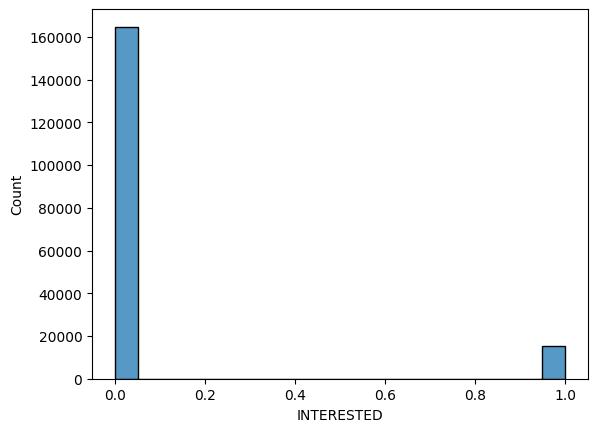

In [43]:
sns.histplot(data['INTERESTED'])

Importando bibliotecas de processamento e estimadores

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier

In [89]:
y = data['INTERESTED']
X = data.drop(['INTERESTED'],axis=1)

In [90]:
def one_hot_enc(data_x):
    categ_cols=['COMPOSICAO','COR','FORMATO','MARCA','TIPO_PRODUTO']
    ohenc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    ohenc_cols = pd.DataFrame(ohenc.fit_transform(data_x[categ_cols]))
    columns_labels = pd.get_dummies(data_x,columns=categ_cols)
    ohenc_cols.index = data_x.index
    columns_labels.index = data_x.index
    data_x = data_x.drop(categ_cols, axis=1)
    data_x = pd.concat([data_x,ohenc_cols],axis=1)
    data_x.columns = columns_labels.columns
    return data_x

In [91]:
X = one_hot_enc(X)
X

,ALTURA,CAPACIDADE_(L),LARGURA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,...,TIPO_PRODUTO_MINI-CACAROLA,TIPO_PRODUTO_OMELETEIRA,TIPO_PRODUTO_PAELLERA,TIPO_PRODUTO_PANELA,TIPO_PRODUTO_PANQUEQUEIRA,TIPO_PRODUTO_PAPEIRO,TIPO_PRODUTO_PIPOQUEIRA,TIPO_PRODUTO_PRENSADOR,TIPO_PRODUTO_SANDUICHEIRA,TIPO_PRODUTO_VAPORELLA
0,30.5,0.0,14.0,0.0,0.0,0.0,50.0,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22.0,0.0,24.0,0.0,0.0,150.0,40.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,24.0,0.0,20.0,1.0,0.0,190.0,20.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49.5,6.0,41.5,1.0,0.0,120.0,47.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,49.5,6.0,41.5,1.0,0.0,120.0,47.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180270,30.5,0.0,14.0,0.0,0.0,0.0,50.0,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
180271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180272,16.0,0.0,18.5,0.0,0.0,0.0,18.5,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180273,49.5,6.0,41.5,1.0,0.0,120.0,47.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [93]:
model = XGBClassifier()

In [94]:
X_train

,ALTURA,CAPACIDADE_(L),LARGURA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,...,TIPO_PRODUTO_MINI-CACAROLA,TIPO_PRODUTO_OMELETEIRA,TIPO_PRODUTO_PAELLERA,TIPO_PRODUTO_PANELA,TIPO_PRODUTO_PANQUEQUEIRA,TIPO_PRODUTO_PAPEIRO,TIPO_PRODUTO_PIPOQUEIRA,TIPO_PRODUTO_PRENSADOR,TIPO_PRODUTO_SANDUICHEIRA,TIPO_PRODUTO_VAPORELLA
73639,13.0,0.0,30.0,1.0,0.0,750.0,52.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132432,17.0,4.2,24.0,0.0,0.0,0.0,38.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79108,47.5,0.0,26.5,0.0,0.0,0.0,7.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137786,46.5,0.0,23.5,0.0,0.0,620.0,64.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46872,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50069,11.0,0.0,30.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5018,19.0,0.0,32.0,0.0,0.0,0.0,50.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126022,10.0,0.0,46.0,1.0,0.0,20.0,56.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16461,30.5,0.0,14.0,0.0,0.0,0.0,50.0,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
X_train.shape

(135206, 123)

In [96]:
y_train.shape

(135206,)

In [97]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [98]:
predictions = model.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.9264239277552198

A acurácia desse modelo é de 92%, o que é um resultado muito bom.

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

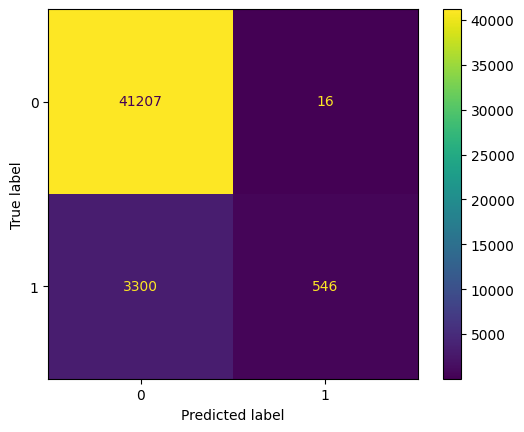

In [101]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Mas se observarmos a matriz de confusão é possível perceber que o modelo tem acertado muito os casos não interessantes e errado a previsão de situações interessantes. Isso porque as classes alvo estão desbalanceadas.

In [102]:
from imblearn.combine import SMOTETomek

In [103]:
smt = SMOTETomek()
X_trn_smt,y_trn_smt = smt.fit_sample(X, y)

<AxesSubplot:xlabel='INTERESTED', ylabel='Count'>

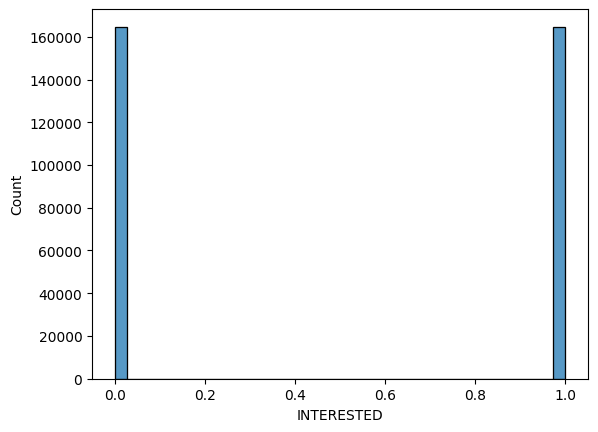

In [104]:
sns.histplot(y_trn_smt)

In [105]:
model2 = XGBClassifier()
model2.fit(X_trn_smt,y_trn_smt)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [106]:
predictions2 = model2.predict(X_test)

In [107]:
accu2 = accuracy_score(predictions2,y_test)
accu2

0.7182764205995251

A acurácia do modelo melhorado caiu para 72%.

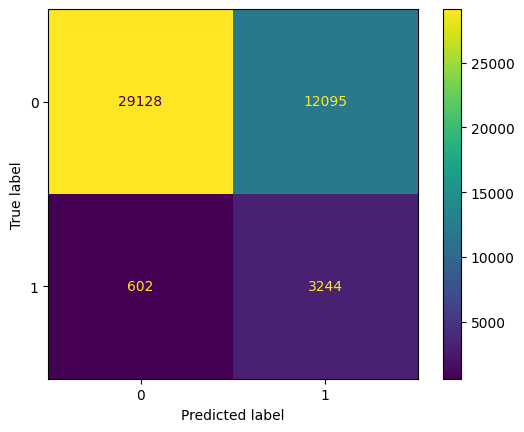

In [108]:
cm2 = confusion_matrix(y_test, predictions2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()

Entretanto, se olharmos para a matriz de confusão, vemos que agora os resultados estão balanceados e podemos confiar melhor neles.

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model2, X_train, y_train,n_repeats=30,random_state=0)

In [109]:
importance_df = pd.DataFrame({"gain":model2.feature_importances_}, index=X.columns).sort_values("gain", ascending=False)

In [110]:
importance_df.head(20)

,gain
TIPO_PRODUTO_PIPOQUEIRA,0.080432
TEM_GRELHA,0.074058
MARCA_VEC,0.052981
COR_COLORIDO,0.041238
TIPO_PRODUTO_PANELA,0.034626
COR_COBRE,0.030642
MARCA_LA CUISINE,0.026417
ITEM_PRICE,0.025364
COR_CEREJA,0.024623
TIPO_PRODUTO_COMUM,0.024336


Usando a análise de importancia de atributo com a técnica de troca aleatória, é possível perceber que:

 - O atributo **TIPO_PRODUTO** é a característica mais importante e a **Pipoqueira** está na moda! É a principal característica de uma produto atraente.

- O fato que o produto **TEM_GRELHA** também é algo que infuencia boa parte das compras.

- A **MARCA** **VEC** está com uma boa reputação no merado.

- A indicação da **COR**, e o fato do produto te ruma cor estilizada como **COLORIDO** e **COBRE** é o quarto fator mais relevante.